## Soluciones exactas y métodos numéricos EDLEH

* Ecuación diferencial

$$dX_t = \mu X_tdt + \sigma X_t dB_t$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

#### Algunas variables

In [2]:
N = 200
dt = 1/512
mu = 0.05
sg = 0.3
B = np.zeros(N)

#### Simulamos el Browniano

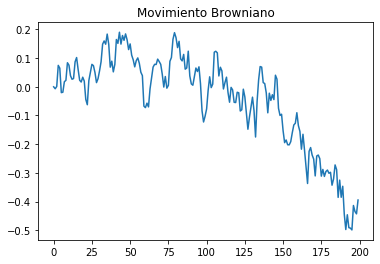

In [3]:
# condición inicial Browniano
B[0] = 0
for i in range(1,N):
    B[i] = B[i-1] - np.sqrt(dt)*np.random.normal()
plt.plot(B)
plt.title('Movimiento Browniano')
plt.show()

* Solución explícita

$$X_t = X_0 e^{(\mu - 1_/2\sigma^2)t + \sigma B_t}$$

In [4]:
SE = np.zeros(N)
# Condición inicial
SE[0] = 10
for i in range(1,N):
    SE[i] = SE[0]*np.exp((mu - (1/2)*sg**2)*(i-1)*dt + sg*B[i])

* Solución exacta discretizada

$$X_{t_i} = X_{t_i - 1}e^{(\mu - 1_/2\sigma^2)\Delta t + \sigma \Delta B_i}$$

In [5]:
SED = np.zeros(N)
# Condición inicial
SED[0] = 10
for i in range(1,N):
    SED[i] = SE[i-1]*np.exp((mu - (1/2)*sg**2)*dt + sg*(B[i]-B[i-1]))

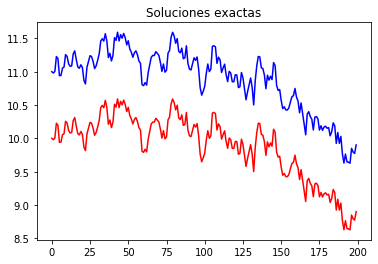

In [6]:
plt.plot(SE, 'red')
# Le sumamos uno para que se vea
plt.plot(SED+ 1, 'blue')
plt.title('Soluciones exactas')
plt.show()

* Esquema numérico de Milstein

$$X_{t_i} = X_{t_i - 1} + \mu X_{t_i-1}\Delta t_i + \sigma X_{t_i-1}\Delta B_i 
  + \frac{1}{2}\sigma^2(\Delta B_i^2-\Delta t_i)\Delta t_i$$

In [7]:
SNM = np.zeros(N)
SNM[0] = 10
for i in range(1,N):
    SNM[i] = SNM[i-1] + mu*SNM[i-1]*dt + sg*SNM[i-1]*(B[i] - B[i-1]) + (1/2)*sg**2*((B[i] - B[i-1])**2-dt)*dt

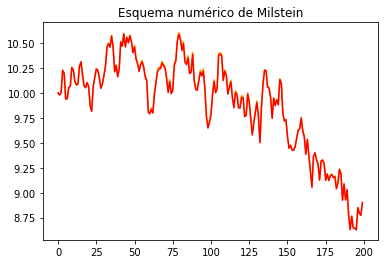

In [8]:
plt.plot(SNM, 'orange')
plt.plot(SE, 'red')
plt.title('Esquema numérico de Milstein')
plt.show()

* Esquema numérico de Euler

$$X_{t_i} = X_{t_i - 1} + \mu X_{t_i-1}\Delta t_i + \sigma X_{t_i-1}\Delta B_i$$

In [9]:
SNE = np.zeros(N)
SNE[0] = 10
for i in range(1,N):
    SNE[i] = SNE[i-1] + mu*SNE[i-1]*dt + sg*SNE[i-1]*(B[i] - B[i-1])

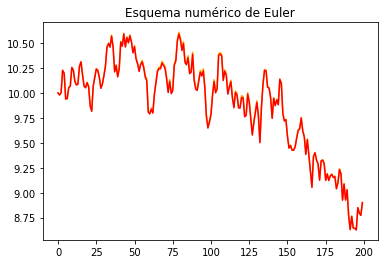

In [10]:
plt.plot(SNE, 'orange')
plt.plot(SE, 'red')
plt.title('Esquema numérico de Euler')
plt.show()

Observamos que al cambiar el parámetro $dt$ los métodos empiezan a fallar